In [ ]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Assuming it's a CSV file, load it into a DataFrame
# Replace 'your_file.csv' with the actual filename
df = pd.read_csv('agricultural_yield.csv')

# Display the DataFrame
print(df.head())


Saving agricultural_yield.csv to agricultural_yield.csv
   Soil_Quality  Seed_Variety  Fertilizer_Amount_kg_per_hectare  Sunny_Days  \
0     93.304721             0                        132.522218   96.670922   
1     83.674653             1                         57.283997   99.007556   
2     65.963033             1                        227.895479  104.844272   
3     78.692834             1                        176.314126   90.136191   
4     72.415684             1                        160.070418  101.221668   

   Rainfall_mm  Irrigation_Schedule  Yield_kg_per_hectare  
0   602.386237                    3            278.986563  
1   466.518251                    8            836.434840  
2   510.320495                    4            785.881787  
3   354.350914                    5            807.884526  
4   443.993788                   10           1064.542374  


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df = pd.read_csv("agricultural_yield.csv")
df.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [ ]:
x = df[['Soil_Quality', 'Seed_Variety', 'Fertilizer_Amount_kg_per_hectare', 'Sunny_Days','Rainfall_mm', 'Irrigation_Schedule']].values
y= df['Yield_kg_per_hectare'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size=0.2,random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

In [ ]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [ ]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 526062.8125 - mae: 696.8510 - val_loss: 551844.8125 - val_mae: 716.4449
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 507620.3438 - mae: 686.5662 - val_loss: 465653.8438 - val_mae: 657.6240
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 392575.4688 - mae: 599.4946 - val_loss: 269661.1562 - val_mae: 501.1199
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 208823.2969 - mae: 436.8615 - val_loss: 76777.5625 - val_mae: 263.5165
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52518.2109 - mae: 209.8731 - val_loss: 15078.5107 - val_mae: 101.7769
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13247.0889 - mae: 94.1168 - val_loss: 9565.8701 - val_mae: 77.8462
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10157.2207 - mae: 79.9981 - val_loss: 8670.2686 - val_mae: 73.8254
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9481.5654 - mae: 77.8958 - val_loss: 8094.93

In [ ]:
test_loss, test_mae=model.evaluate(x_test,y_test,verbose=1)
print(f"Test Mean Absolute Error: (test_mae:.2f)")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2836.6636 - mae: 43.3117 
Test Mean Absolute Error: (test_mae:.2f)


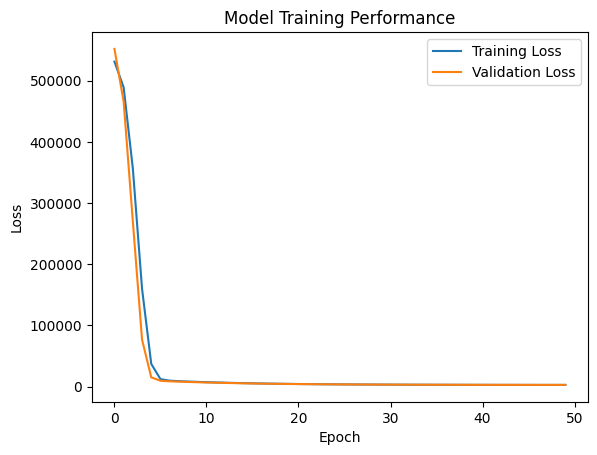

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


<ipython-input-19-5302adfa850d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')
<ipython-input-19-5302adfa850d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted Yield')


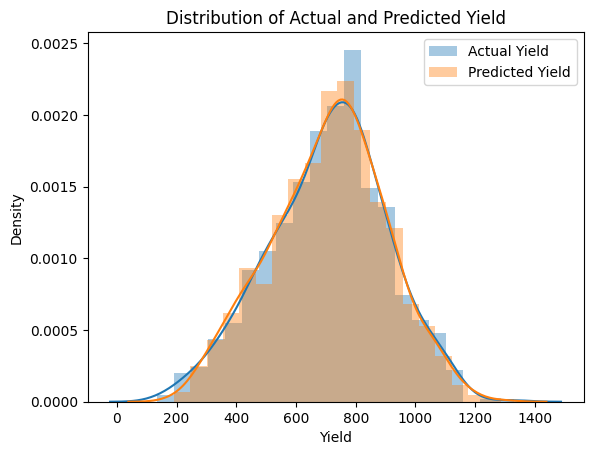

In [ ]:
# Distribution plots
import seaborn as sns
y_pred = model.predict(x_test)
sns.distplot(y_test, label='Actual Yield')
sns.distplot(y_pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()